In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.GeometricStressEnergyTensor
using Plots

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
bubbles = Bubbles([Bubble(Point3(0., 0., -d / 2) , R), Bubble(Point3(0., 0., d / 2), R)])
bubbles

Bubbles(Bubble[Bubble(Point3([0.0, 0.0, -1.2]), 2.0), Bubble(Point3([0.0, 0.0, 1.2]), 2.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Vec3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 1 method)

In [4]:
k_0

1.9634954084936207

In [5]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

# Computing Analytically

comparing $$\tilde{(\partial_i\phi\partial_j\phi)}(k\hat{z})$$

For different i, j

In [6]:
ΔV = 1.
analytic_ii_integral = @. (4 * ΔV / (3 * ks)) * π * R^2 * sin(R * ks + d * ks / 2)

1000-element Vector{Float64}:
 50.15767486229104
 49.45531016706393
 48.69330137174879
 47.873402635005945
 46.99749779530277
 46.06759519057977
 45.0858221420004
 44.0544191183294
 42.97573359842899
 41.852213650250185
  ⋮
 -0.41096408773421805
 -0.3627860208598843
 -0.31329933707875657
 -0.26269815425219095
 -0.21118051461138443
 -0.15894761132980714
 -0.10620300445467072
 -0.05315182924662037
 -2.0900638705448165e-15

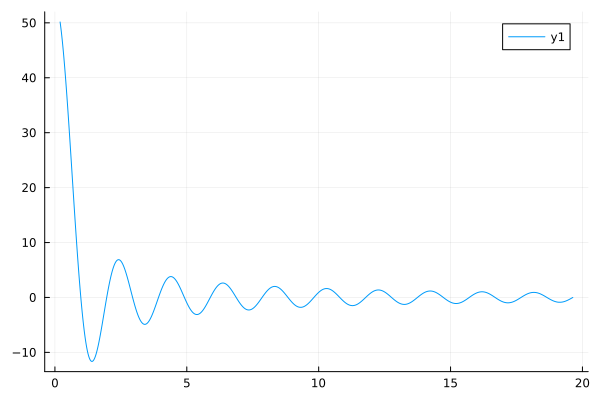

In [7]:
plot(ks, analytic_ii_integral)

# Computing Numerically

In [8]:
@time numerical_T = surface_integral(k_vecs, bubbles, ΔV=ΔV; rtol=1e-5)

  6.719058 seconds (33.15 M allocations: 1.396 GiB, 5.05% gc time, 77.31% compilation time)


1000×6 Matrix{ComplexF64}:
    19.0715+0.0im          0.0+0.0im  …  0.0+0.0im     12.0147+4.44089e-16im
    18.8784+0.0im          0.0+0.0im     0.0+0.0im     11.6986+0.0im
    18.6684+4.44089e-16im  0.0+0.0im     0.0+0.0im     11.3565+0.0im
     18.442+4.44089e-16im  0.0+0.0im     0.0+0.0im     10.9895-4.44089e-16im
    18.1994+0.0im          0.0+0.0im     0.0+0.0im     10.5986+0.0im
    17.9412+0.0im          0.0+0.0im  …  0.0+0.0im     10.1852-8.88178e-16im
    17.6678+0.0im          0.0+0.0im     0.0+0.0im     9.75027+1.77636e-15im
    17.3796+0.0im          0.0+0.0im     0.0+0.0im     9.29524+0.0im
    17.0771+8.88178e-16im  0.0+0.0im     0.0+0.0im     8.82145+0.0im
     16.761+0.0im          0.0+0.0im     0.0+0.0im      8.3303+0.0im
           ⋮                          ⋱                       ⋮
 -0.0329136-1.66533e-16im  0.0+0.0im     0.0+0.0im   -0.345137-1.11022e-16im
 -0.0334338-5.55112e-17im  0.0+0.0im     0.0+0.0im   -0.295918+2.22045e-16im
 -0.0338738-2.22045e-16im  0.0+0.

In [9]:
numerical_T

1000×6 Matrix{ComplexF64}:
    19.0715+0.0im          0.0+0.0im  …  0.0+0.0im     12.0147+4.44089e-16im
    18.8784+0.0im          0.0+0.0im     0.0+0.0im     11.6986+0.0im
    18.6684+4.44089e-16im  0.0+0.0im     0.0+0.0im     11.3565+0.0im
     18.442+4.44089e-16im  0.0+0.0im     0.0+0.0im     10.9895-4.44089e-16im
    18.1994+0.0im          0.0+0.0im     0.0+0.0im     10.5986+0.0im
    17.9412+0.0im          0.0+0.0im  …  0.0+0.0im     10.1852-8.88178e-16im
    17.6678+0.0im          0.0+0.0im     0.0+0.0im     9.75027+1.77636e-15im
    17.3796+0.0im          0.0+0.0im     0.0+0.0im     9.29524+0.0im
    17.0771+8.88178e-16im  0.0+0.0im     0.0+0.0im     8.82145+0.0im
     16.761+0.0im          0.0+0.0im     0.0+0.0im      8.3303+0.0im
           ⋮                          ⋱                       ⋮
 -0.0329136-1.66533e-16im  0.0+0.0im     0.0+0.0im   -0.345137-1.11022e-16im
 -0.0334338-5.55112e-17im  0.0+0.0im     0.0+0.0im   -0.295918+2.22045e-16im
 -0.0338738-2.22045e-16im  0.0+0.

In [10]:
numerical_ii_integral = @views (numerical_T[:, 1] + numerical_T[:, 4] + numerical_T[:, 6]) .|> real

1000-element Vector{Float64}:
 50.15767431477722
 49.4553096195501
 48.693300824234974
 47.87340208749214
 46.99749724778894
 46.06759464306596
 45.08582159448659
 44.054418570815585
 42.975733050915174
 41.85221310273635
  ⋮
 -0.41096408624774394
 -0.36278601937340915
 -0.31329933559228546
 -0.262698152765729
 -0.21118051312491343
 -0.158947609843333
 -0.10620300296820087
 -0.053151827760152065
  1.4864662140068319e-9

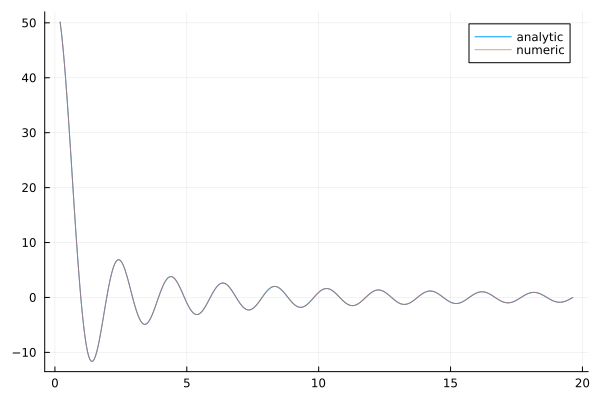

In [11]:
plot(ks, analytic_ii_integral, label="analytic")
plot!(ks, numerical_ii_integral, label="numeric", alpha=0.7)

# Comparing z, z component

In [13]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

In [14]:
analytic_zz_integral = @. 4π * ΔV / 3 / ks^3 * (d * ks + (2 * ks * R * cos(ks * R) - (2 - ks ^2 * R ^ 2) * sin(ks * R)) * cos(d * ks / 2) - (2 * ks * R * sin(ks * R) + (2 - ks ^ 2 * R ^ 2) * cos(ks * R)) * sin(ks * d / 2))

1000-element Vector{Float64}:
 12.014711412774016
 11.698567044742866
 11.356480931012376
 10.98947622903871
 10.598649887163068
 10.185169191970578
  9.750268096131444
  9.295243338677393
  8.8214503703372
  8.330299097183236
  ⋮
 -0.34513691933676965
 -0.2959183638802855
 -0.2455517119744028
 -0.19423404513063106
 -0.14216572596095114
 -0.08954961836159708
 -0.0365902995830059
  0.01650673275991794
  0.06953585566980396

In [15]:
numeric_zz_integral = numerical_T |> x -> x[:, 4] |> real

1000-element Vector{Float64}:
 12.014577617205738
 11.698433249174556
 11.356347135444077
 10.989342433470418
 10.598516091594723
 10.185035396402235
  9.750134300563074
  9.29510954310904
  8.82131657476883
  8.330165301614807
  ⋮
 -0.3452708497792414
 -0.2960522835537225
 -0.24568562033837152
 -0.1943679416742203
 -0.14229961020532586
 -0.08968348986246218
 -0.03672415793299829
  0.01637288792893539
  0.06940202468455034

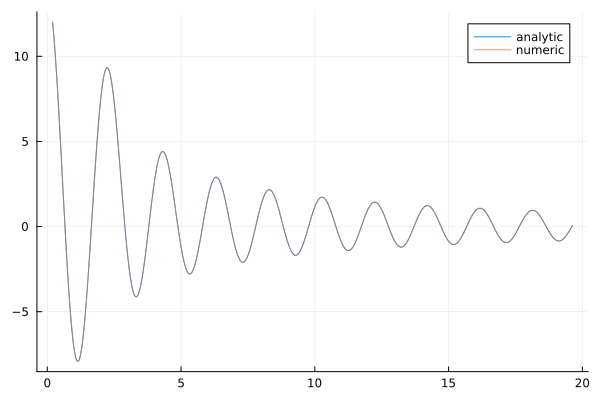

In [16]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numeric_zz_integral, label="numeric", alpha=0.7)

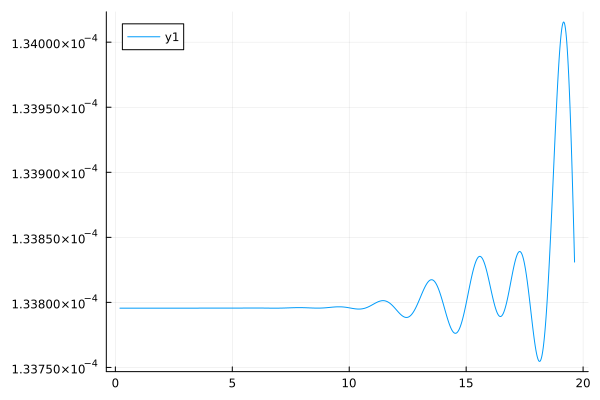

In [17]:
plot(ks, analytic_zz_integral - numeric_zz_integral)

# comparing xx integral

In [18]:
analytic_xx_integral = @. -2π * ΔV / (3 * ks ^ 3) * (d * ks + 2 * (ks * R * cos(ks * R) - sin(ks * R)) * cos(d * ks / 2) - 2 * (ks * R * sin(ks * R) + cos(ks * R)) * sin(d * ks / 2))

1000-element Vector{Float64}:
 19.071481724758524
 18.87837156116055
 18.66841022036821
 18.441963202983615
 18.199423954069854
 17.94121299930461
 17.667777022934473
 17.379587889826002
 17.077141614045892
 16.76095727653346
  ⋮
 -0.03291358419872146
 -0.03343382848979387
 -0.03387381255217544
 -0.034232054560779934
 -0.03450739432521368
 -0.03469899648410203
 -0.03480635243583091
 -0.034829281003267626
 -0.034767927834901506

In [19]:
numeric_xx_integral = numerical_T |> x -> x[:, 2] |> real

1000-element Vector{Float64}:
 19.071362842762948
 18.878252679164962
 18.66829133837264
 18.441844320988032
 18.199305072074228
 17.941094117308985
 17.667658140938862
 17.379469007830355
 17.077022732050203
 16.760838394537807
  ⋮
 -0.033032395014866656
 -0.03355263663001683
 -0.03399261829967024
 -0.03435085821097996
 -0.034626196185186565
 -0.03481779687184106
 -0.034925151679542764
 -0.03494807944060754
 -0.03488672581215998

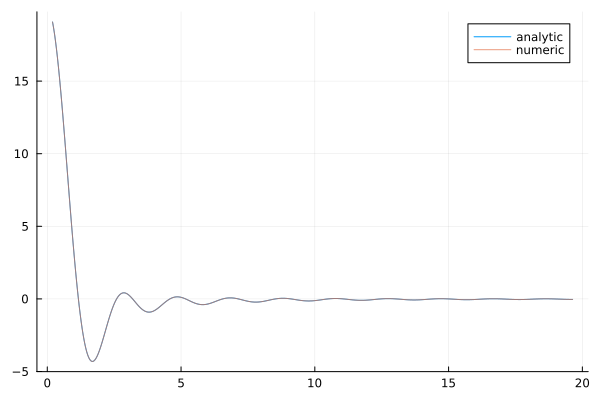

In [20]:
plot(ks, analytic_xx_integral, label="analytic")
plot!(ks, numeric_xx_integral, label="numeric", alpha=0.7)

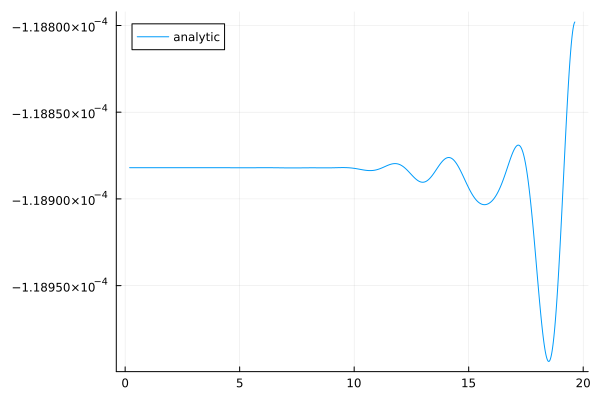

In [21]:
plot(ks, numeric_xx_integral - analytic_xx_integral, label="analytic")

# Comparing xx and yy

In [22]:
numeric_yy_integral = numerical_T |> x -> x[:, 3] |> real

1000-element Vector{Float64}:
 19.071362842762944
 18.878252679164962
 18.668291338372644
 18.441844320988032
 18.199305072074225
 17.94109411730898
 17.667658140938862
 17.37946900783035
 17.077022732050207
 16.7608383945378
  ⋮
 -0.03303239501486674
 -0.033552636630016855
 -0.03399261829967014
 -0.03435085821097996
 -0.03462619618518663
 -0.03481779687184105
 -0.03492515167954276
 -0.03494807944060753
 -0.03488672581216003

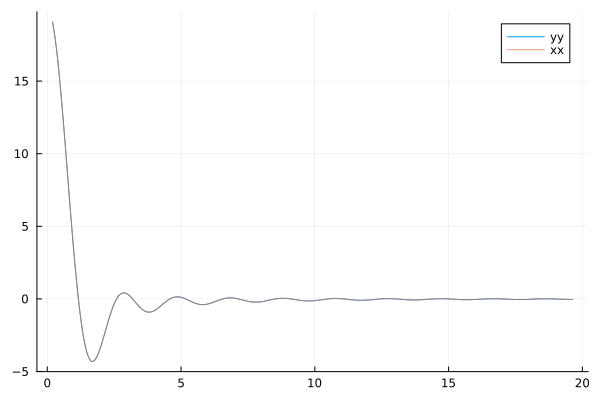

In [23]:
plot(ks, numeric_yy_integral, label="yy")
plot!(ks, numeric_xx_integral, label="xx", alpha=0.7)

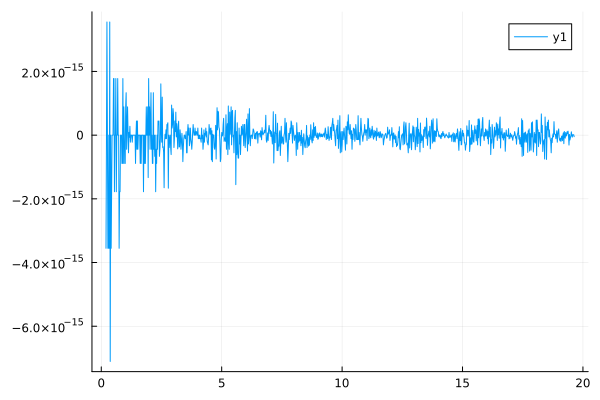

In [24]:
plot(ks, numeric_yy_integral - numeric_xx_integral)

# Volume Integration

## numerical computation

In [25]:
import EnvelopeApproximation.StressEnergyTensor: potential_integral
n_ϕ = n_μ = 10
ΔV = 1.
numeric_integral = potential_integral(k_vecs, bubbles, n_ϕ, n_μ, ΔV, rtol=1e-3) .|> real

1000-element Vector{Float64}:
 -57.21444517403678
 -56.63511468324293
 -56.00523066086589
 -55.32588960871215
 -54.59827186197086
 -53.823638997675104
 -53.003331068564734
 -52.138763669239296
 -51.23142484189893
 -50.282871829361696
   ⋮
   0.0987407717387512
   0.10030150479600106
   0.10162145710628684
   0.10269618319239468
   0.10352220248136504
   0.10409700888748397
   0.10441907660451245
   0.10448786209986481
   0.10430380231803221

## Analytical computation

In [26]:
function single_bubble_contribution(k)
    return (-ΔV) * 8 * π * cos(k * d / 2) * (sin(k * R) - (k * R) * cos(k * R)) / (k ^ 3)
end

single_bubble_contribution (generic function with 1 method)

In [27]:
function intersection_contribution(k)
    res = (π*d*k - 2*(π*R*k*cos(R*k) - π*sin(R*k))*cos(1/2*d*k) - 2*(π*R*k*sin(R*k) + π*cos(R*k))*sin(1/2*d*k))/k^3
    return 2 * (-ΔV) * real(res)
end

intersection_contribution (generic function with 1 method)

In [28]:
analytic_volume_integral = @. single_bubble_contribution(ks) - intersection_contribution(ks)

1000-element Vector{Float64}:
 -57.21444517427557
 -56.63511468348162
 -56.00523066110464
 -55.32588960895085
 -54.59827186220958
 -53.82363899791381
 -53.00333106880342
 -52.138763669477996
 -51.23142484213767
 -50.28287182960035
   ⋮
   0.0987407525961645
   0.10030148546938163
   0.10162143765652634
   0.10269616368233975
   0.10352218297564103
   0.10409698945230605
   0.10441905730749268
   0.1044878430098029
   0.10430378350470453

## Comparison

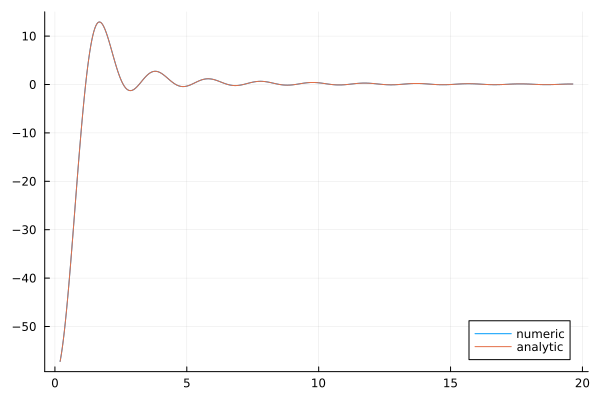

In [29]:
plot(ks, numeric_integral, label="numeric")
plot!(ks, analytic_volume_integral, label="analytic")

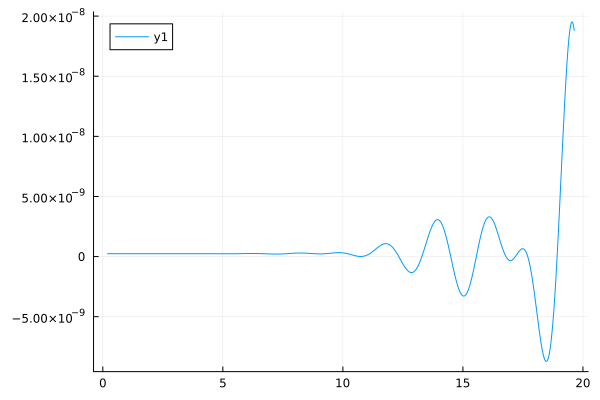

In [30]:
plot(ks, numeric_integral - analytic_volume_integral)

# Computing $T_{\mu\nu}$ and saving the data

In [31]:
tensor_directions

4-element Vector{Union{Symbol, Tuple{Symbol, Symbol}}}:
 :trace
 (:x, :x)
 (:y, :y)
 (:z, :z)

In [32]:
numerical_T

1000×4 Matrix{ComplexF64}:
      50.1573-6.2013e-9im   …     12.0146-2.23202e-9im
      49.4549-6.81585e-9im        11.6984-2.45321e-9im
      48.6929-7.43039e-9im        11.3563-2.6744e-9im
       47.873-8.04494e-9im        10.9893-2.89559e-9im
      46.9971-8.65948e-9im        10.5985-3.11678e-9im
      46.0672-9.27402e-9im  …      10.185-3.33797e-9im
      45.0855-9.88857e-9im        9.75013-3.55916e-9im
       44.054-1.05031e-8im        9.29511-3.78035e-9im
      42.9754-1.11177e-8im        8.82132-4.00154e-9im
      41.8518-1.17322e-8im        8.33017-4.22273e-9im
             ⋮              ⋱  
    -0.411336-6.15215e-7im      -0.345271-2.21432e-7im
    -0.363158-6.15829e-7im      -0.296052-2.21654e-7im
    -0.313671-6.16444e-7im      -0.245686-2.21875e-7im
     -0.26307-6.17058e-7im      -0.194368-2.22096e-7im
    -0.211552-6.17673e-7im  …     -0.1423-2.22317e-7im
    -0.159319-6.18287e-7im     -0.0896835-2.22538e-7im
    -0.106574-6.18902e-7im     -0.0367242-2.22759e-7im
   -0.0

In [33]:
numerical_Tij = Dict("T_xx" => numeric_xx_integral - numeric_integral, "T_yy" => numeric_yy_integral - numeric_integral, "T_zz" => numeric_zz_integral - numeric_integral)
analytic_Tij = Dict("T_xx" => analytic_xx_integral - analytic_volume_integral, 
                    "T_yy" => analytic_xx_integral - analytic_volume_integral, 
                    "T_zz" => analytic_zz_integral - analytic_volume_integral)

Dict{String, Vector{Float64}} with 3 entries:
  "T_zz" => [69.2292, 68.3337, 67.3617, 66.3154, 65.1969, 64.0088, 62.7536, 61.…
  "T_xx" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…
  "T_yy" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…

In [34]:
k_vecs .|> collect

1000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.21580760345605562]
 [0.0, 0.0, 0.23526566606274915]
 [0.0, 0.0, 0.2547237286694427]
 [0.0, 0.0, 0.27418179127613623]
 [0.0, 0.0, 0.29363985388282976]
 [0.0, 0.0, 0.31309791648952334]
 [0.0, 0.0, 0.33255597909621687]
 [0.0, 0.0, 0.3520140417029104]
 [0.0, 0.0, 0.3714721043096039]
 ⋮
 [0.0, 0.0, 19.47928958408266]
 [0.0, 0.0, 19.498747646689356]
 [0.0, 0.0, 19.518205709296048]
 [0.0, 0.0, 19.53766377190274]
 [0.0, 0.0, 19.557121834509434]
 [0.0, 0.0, 19.576579897116126]
 [0.0, 0.0, 19.59603795972282]
 [0.0, 0.0, 19.615496022329516]
 [0.0, 0.0, 19.634954084936208]

In [35]:
complete_data = Dict("numerical_T" => numerical_Tij, 
                     "analytical_T" => analytic_Tij, 
                     "R" => R, 
                     "d" => d, 
                     "ΔV" => ΔV, 
                     "ks" => k_vecs .|> collect)

Dict{String, Any} with 6 entries:
  "ks"           => [[0.0, 0.0, 0.19635], [0.0, 0.0, 0.215808], [0.0, 0.0, 0.23…
  "analytical_T" => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "numerical_T"  => Dict("T_zz"=>[69.229, 68.3335, 67.3616, 66.3152, 65.1968, 6…
  "R"            => 2.0
  "ΔV"           => 1.0
  "d"            => 2.4

In [36]:
using JSON
open("double_bubble_benchmark_data.json", "w") do f
    JSON.print(f, complete_data)
end